<a href="https://colab.research.google.com/github/Git-Hub-Ran/Machine_Learning/blob/Dev/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: left">

# 🐍 Titanic Survival Prediction - ML Project

---

## 📝 Task Description

**Goal:** Complete a simple **ML project** to predict survival on the Titanic using Python and pandas.

### Steps:
1. 📂 **Load the Titanic dataset**  
   - Use the Kaggle Titanic dataset or any CSV copy.
2. 🧹 **Clean / Transform the data**  
3. 🤖 **Train a basic classifier**  
   - Random Forest, Decision Tree
4. 📊 **Evaluate the model**  
   - Accuracy, confusion matrix, or other relevant metrics
5. 📝 **Document the process**  
   - Describe the problem, approach, and results

This project helps you **solidify Python and ML skills** and demonstrates your ability to apply **machine learning principles** in code.
</div>


In [128]:
#Based on https://www.kaggle.com/competitions/titanic/data
#Importing Libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Raw URLs from GitHub
url_train = "https://raw.githubusercontent.com/Git-Hub-Ran/Machine_Learning/refs/heads/main/train.csv"
url_test  = "https://raw.githubusercontent.com/Git-Hub-Ran/Machine_Learning/refs/heads/main/test.csv"

# Loading the files
train = pd.read_csv(url_train) #used to build and train the machine learning models
test  = pd.read_csv(url_test) #used to see how well the model performs on unseen data

# Display the first 5 lines from each file:
print(f"train file:\n{'-'*50}")
print(train.head()) #The training set should be used to build your machine learning models.

print(f"\n test file:\n{'-'*50}")
print(test.head()) #The test set should be used to see how well your model performs on unseen data.

train file:
--------------------------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123    

In [129]:
# describe(include = ['O'])* will show the descriptive statistics of object data types:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


I want to test the Sex, we can see we don't have missing data (we have exactly 891) and only 'male' or 'female' values.
**Sex is a reliable column to use.**

In [130]:
# checking if any column has some missing values:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


We see that Age and Cabin have missing values (they are less than 891).

Text(0, 0.5, 'Number_of_people')

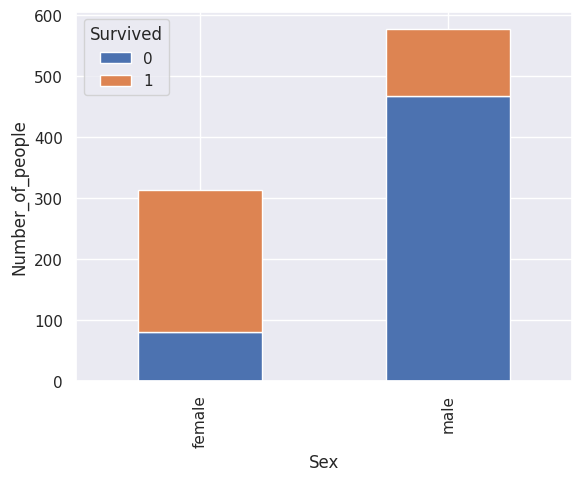

In [131]:
#Finding relations between 'Sex' and survival:
pd.crosstab(train['Sex'], train['Survived']).plot(kind='bar', stacked=True)
plt.ylabel("Number_of_people")

We see the following:
- There are more males than females.
- Most of the females survived.
- Most of the males didn't survived.

In [132]:
#Mapping 'Sex' values into numbers, so we can use DecisionTreeRegressor later (It doesn't support String):
train['Sex_num']=train['Sex'].map({'male':1,'female':2})
train[['Sex','Sex_num']].head()

,Sex,Sex_num
0,male,1
1,female,2
2,female,2
3,female,2
4,male,1


In [133]:
test['Sex_num']=test['Sex'].map({'male':1,'female':2})
test[['Sex','Sex_num']].head()

,Sex,Sex_num
0,male,1
1,female,2
2,male,1
3,male,1
4,female,2


Creating and training Decision Tree:

In [134]:
#Defining the target (Y) and the feature columns (x):
Y = train['Survived']
x = train[['Sex_num','Age']]
#Split the data into training set and validation set:
x_train, x_val, Y_train, Y_val = train_test_split(x,Y,random_state=0)

#Defining the model to Decision Tree Regressor:
dtree = DecisionTreeRegressor(random_state=0)

#Train the model on the training set:
dtree.fit(x_train,Y_train)

#Predict Survived on the validation data:
prediction = dtree.predict(x_val)

#Calculate MAE:
print("MAE:",mean_absolute_error(Y_val,prediction))

MAE: 0.2983317927712546


In [135]:
#Build a function to find the lowest MAE, because the optimal tree is in the lowest point of MAE:
def get_mae(leaf,x_train, x_val, Y_train, Y_val):
    dtree = DecisionTreeRegressor(max_leaf_nodes=leaf , random_state=0) #Defining the model
    dtree.fit(x_train,Y_train)#Train the model
    prediction = dtree.predict(x_val)#Predict Survived
    mae=mean_absolute_error(Y_val,prediction)#Calculate MAE
    return mae

#Trying the model on trees in different depths:
depths=[5,25,50,100,250,500,1000]
scores={}

for leaf in depths:
    scores[leaf] = get_mae(leaf, x_train, x_val, Y_train, Y_val)

# Find the leaf with the lowest MAE
best_leaf = min(scores, key=scores.get)
print("Best leaf:", best_leaf, "with MAE:", scores[best_leaf])

Best leaf: 100 with MAE: 0.2983317927712546


In [136]:
#Now we can build the model on the full train file and use the best leaf number:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_leaf , random_state=0)

#Fit the final model:
final_model.fit(x,Y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)

Using the features from the test file:

In [137]:
x_test_final = test[['Sex_num','Age']]

#Predict on test file:
test_predictions = final_model.predict(x_test_final)

#Show test predictions:
print("Predictions on test file:", test_predictions[:10])

Predictions on test file: [0.         0.5        0.33333333 0.5        0.82352941 0.
 0.81818182 0.22580645 0.61538462 0.0625    ]


Use Random Forest:

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

#Fit the model:
rf_model.fit(x_train,Y_train)

#Predict Survived on the validation data:
prediction = rf_model.predict(x_val)

#Calculate MAE:
print("MAE:",mean_absolute_error(Y_val,prediction))

MAE: 0.29966617972795756
